<a href="https://colab.research.google.com/github/hojuna/Black-box_Optimization_dacon/blob/main/cluster_x6_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_df = pd.read_csv('/content/drive/MyDrive/dacon/2024_8_data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/dacon/2024_8_data/test.csv')



0        0
1        1
2        1
3        1
4        0
        ..
40113    0
40114    0
40115    0
40116    0
40117    1
Name: cluster, Length: 40118, dtype: int64


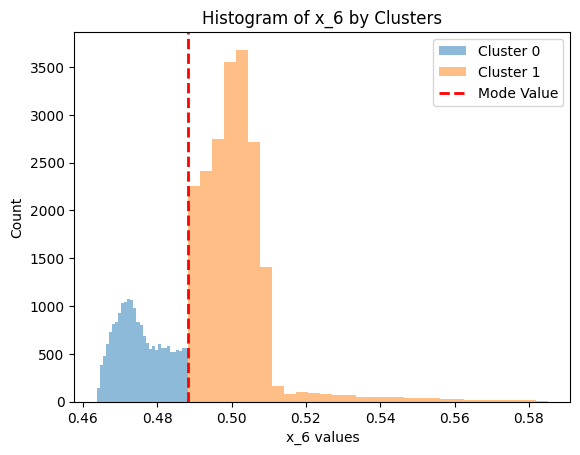

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode



# # 최빈값 계산
# mode_result = mode(train_df['x_6'])  # mode() 함수 호출
# print(mode_result)
# mode_value = mode_result[0]  # 최빈값 추출
# # 최빈값을 기준으로 데이터를 분리
# train_df['cluster'] = np.where(train_df['x_6'] <= mode_value, 0, 1)

mean_result= train_df['x_6'].mean()
train_df['cluster'] = np.where(train_df['x_6'] <= mean_result, 0, 1)

print(train_df['cluster'])
# # 결과 출력
# print(f"최빈값: {mode_value}")

# 클러스터링 결과 시각화
plt.hist(train_df[train_df['cluster'] == 0]['x_6'], bins=30, alpha=0.5, label='Cluster 0')
plt.hist(train_df[train_df['cluster'] == 1]['x_6'], bins=30, alpha=0.5, label='Cluster 1')
plt.axvline(mean_result, color='r', linestyle='dashed', linewidth=2, label='Mode Value')
plt.xlabel('x_6 values')
plt.ylabel('Count')
plt.title('Histogram of x_6 by Clusters')
plt.legend()
plt.show()


                ID       x_0       x_1       x_2       x_3       x_4  \
0      TRAIN_00000  1.006187 -1.962566  1.247535  0.926500 -0.265766   
1      TRAIN_00001  1.024647 -2.472625  1.144386  0.846499 -0.287336   
2      TRAIN_00002  1.062444 -2.451003  1.186546  0.873599 -0.257828   
3      TRAIN_00003  1.089189 -2.458470  1.184531  0.810867 -0.276517   
4      TRAIN_00004  1.023323 -2.133468  1.242266  0.939837 -0.264515   
...            ...       ...       ...       ...       ...       ...   
40113  TRAIN_40113  1.071602 -2.162285  1.243174  0.923911 -0.259240   
40114  TRAIN_40114  1.104710 -2.280343  1.226507  0.902117 -0.250661   
40115  TRAIN_40115  1.084876 -2.143004  1.244276  0.891797 -0.248833   
40116  TRAIN_40116  0.994186 -1.562092  1.227734  0.908147 -0.313856   
40117  TRAIN_40117  1.090381 -2.379771  1.172301  0.847332 -0.269832   

            x_5       x_6       x_7       x_8       x_9      x_10  \
0     -1.789301  0.470004 -0.139467  0.623996  0.320359  0.078612 

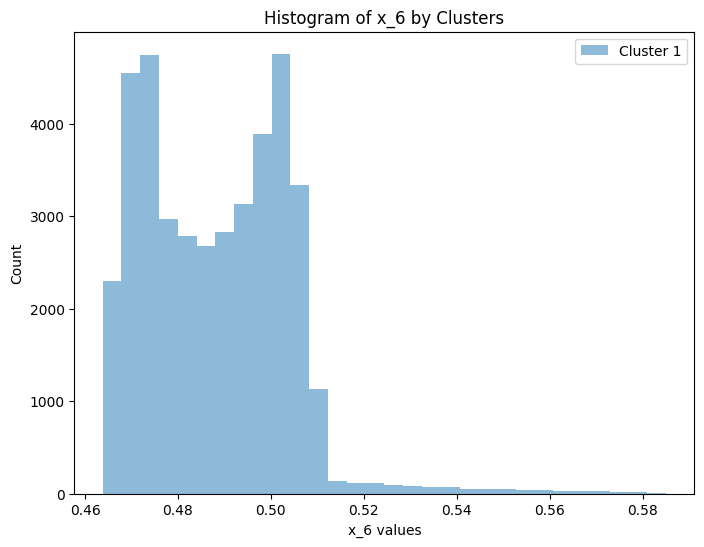

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


# # # Z-Score 정규화
# # scaler = StandardScaler()
# # train_df['x_6_standardized'] = scaler.fit_transform(train_df[['x_6']])

# scaler = MinMaxScaler()
# train_df['x_6_normalized'] = scaler.fit_transform(train_df[['x_6']])

# print(train_df)

# # 클러스터 결과 시각화
# plt.figure(figsize=(8, 6))
# plt.hist(train_df['x_6'], bins=30, alpha=0.5, label='Cluster 1')
# plt.legend()
# plt.xlabel('x_6 values')
# plt.ylabel('Count')
# plt.title('Histogram of x_6 by Clusters')
# plt.show()


In [ ]:
from sklearn.cluster import KMeans

dump=(train_df)

for i in dump:
  df_kManes=i
  # 예시로 사용된 DataFrame (df)에서 x_6 변수를 가져와서 reshape
  X = df_kManes['x_6_standardized'].values.reshape(-1, 1)

  # K-Means 클러스터링 수행 (클러스터 수는 2로 설정)
  kmeans = KMeans(n_clusters=2, random_state=42)
  df_kManes['x_6_cluster'] = kmeans.fit_predict(X)
  i=df_kManes

  # 열을 재배치하는 방법 (12번째 열과 13번째 열을 교환)
  train_df = train_df[['ID', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_6_cluster', 'y']]


# 클러스터 결과 시각화
plt.figure(figsize=(8, 6))
plt.hist(df_kManes[df_kManes['x_6_cluster'] == 0]['x_6'], bins=30, alpha=0.5, label='Cluster 1')
plt.hist(df_kManes[df_kManes['x_6_cluster'] == 1]['x_6'], bins=30, alpha=0.5, label='Cluster 2')
plt.legend()
plt.xlabel('x_6 values')
plt.ylabel('Count')
plt.title('Histogram of x_6 by Clusters')
plt.show()


TypeError: string indices must be integers

In [ ]:
y_mean_cluster_0 = train_df[train_df['cluster'] == 0]['y'].mean()

# x_6_cluster 값이 1인 행들의 y값 평균
y_mean_cluster_1 = train_df[train_df['cluster'] == 1]['y'].mean()

print(f"x_6_cluster가 0인 행들의 y값 평균: {y_mean_cluster_0}")
print(f"x_6_cluster가 1인 행들의 y값 평균: {y_mean_cluster_1}")

x_6_cluster가 0인 행들의 y값 평균: 84.14270660183182
x_6_cluster가 1인 행들의 y값 평균: 83.12481425798715


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40118 entries, 0 to 40117
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           40118 non-null  object 
 1   x_0          40118 non-null  float64
 2   x_1          40118 non-null  float64
 3   x_2          40118 non-null  float64
 4   x_3          40118 non-null  float64
 5   x_4          40118 non-null  float64
 6   x_5          40118 non-null  float64
 7   x_6          40118 non-null  float64
 8   x_7          40118 non-null  float64
 9   x_8          40118 non-null  float64
 10  x_9          40118 non-null  float64
 11  x_10         40118 non-null  float64
 12  x_6_cluster  40118 non-null  int32  
 13  y            40118 non-null  float64
dtypes: float64(12), int32(1), object(1)
memory usage: 4.1+ MB


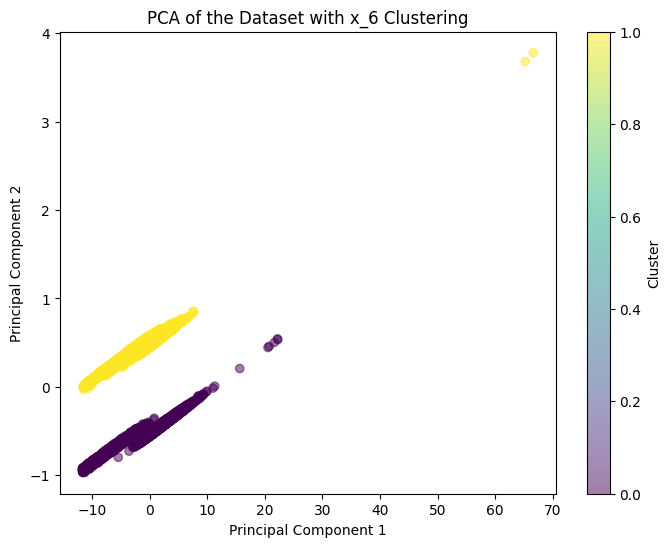

In [ ]:
from sklearn.decomposition import PCA

df=train_df


X_all= df.drop(columns=['ID'])  # 'ID' 열 제거

y = df['y']  # 종속 변수

# PCA 수행
pca = PCA(n_components=2)  # 2차원으로 축소
X_pca = pca.fit_transform(X_all)

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['x_6_cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Dataset with x_6 Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.model_selection import RandomizedSearchCV


if os.path.exists("/content/drive/MyDrive/dacon/model/baseline_model_saved_2.pkl"):
  model = joblib.load("baseline_model_saved2.pkl")

else:
  X = train_df.iloc[:, 1:-1]  # Features
  y = train_df['y']  # Target



  # 모델 초기화
  model = RandomForestRegressor(random_state=42)

  # # 하이퍼파라미터 그리드 설정
  # param_grid = {
  #     'n_estimators': [100, 200, 300, 400, 500],
  #     'max_depth': [None, 10, 20, 30, 40],
  #     'min_samples_split': [2, 5, 10],
  #     'min_samples_leaf': [1, 2, 4],
  #     'max_features': ['auto', 'sqrt', 'log2']
  # }
  param_grid = {
      'n_estimators': [100, 300, 500, 700,1000 ],  # 결정 트리의 개수
      'max_depth': [None, 5, 10, 20, 30, 50],  # 트리의 최대 깊이
      'min_samples_split': [2, 5, 10, 20],  # 노드를 분할하기 위한 최소 샘플 수
      'min_samples_leaf': [1, 2, 4, 8, 16],  # 리프 노드에 필요한 최소 샘플 수
      'max_features': ['auto', 'sqrt', 'log2', 0.5, None],  # 각 분할에서 고려할 특성의 최대 수
      'bootstrap': [True, False],  # 부트스트랩 샘플링 여부
  }


  # # GridSearchCV 설정
  # grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

  # # GridSearchCV 실행
  # grid_search.fit(X, y)

  # # 최적의 하이퍼파라미터 출력
  # print("Best Hyperparameters:", grid_search.best_params_)

  # 최적의 모델로 교차 검증 수행
  # best_model = grid_search.best_estimator_

  # 모델 및 랜덤 서치 객체 정의

  random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

  # 모델 훈련
  random_search.fit(X, y)

  # 최적 파라미터 출력
  print("Best parameters found: ", random_search.best_params_)

  # 최적의 모델로 교차 검증 수행
  best_model = random_search.best_estimator_

  # 교차 검증을 통한 최종 성능 평가
  cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
  print(f"Cross-validation MSE: {-cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


  # best_model=model

  # 최적의 모델로 전체 데이터셋에 대해 훈련
  # best_model.fit(X, y)

  # 필요한 경우, 모델 저장 또는 추가 평가
  # 예: joblib.dump(best_model, 'best_random_forest_model.pkl')
  # model=best_model

  joblib.dump(model, "/content/drive/MyDrive/dacon/model/baseline_model_saved_2.pkl")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", l

Best parameters found:  {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Cross-validation MSE: 2.7932 (+/- 0.8807)


In [ ]:
test_df.info()
train_df.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4986 non-null   object 
 1   x_0          4986 non-null   float64
 2   x_1          4986 non-null   float64
 3   x_2          4986 non-null   float64
 4   x_3          4986 non-null   float64
 5   x_4          4986 non-null   float64
 6   x_5          4986 non-null   float64
 7   x_6          4986 non-null   float64
 8   x_7          4986 non-null   float64
 9   x_8          4986 non-null   float64
 10  x_9          4986 non-null   float64
 11  x_10         4986 non-null   float64
 12  x_6_cluster  4986 non-null   int32  
dtypes: float64(11), int32(1), object(1)
memory usage: 487.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40118 entries, 0 to 40117
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   

In [ ]:
X_test = test_df.iloc[:, 1:]
y_pred = model.predict(X_test)

# Identify top 5% of predicted values
threshold = np.percentile(y_pred, 95)
top_5_percent_mask = y_pred >= threshold

# Create submission file
submission_df = pd.read_csv('/content/drive/MyDrive/dacon/2024_8_data/sample_submission.csv')
submission_df['y'] = y_pred
submission_df.to_csv('/content/drive/MyDrive/dacon/2024_8_data/cluster_submission.csv', index=False)

print(f"Top 5% threshold: {threshold:.4f}")
print(f"Number of samples in top 5%: {sum(top_5_percent_mask)}")

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.